In [119]:
# Import the necessary libraries
import math
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
plt.style.use('ggplot')

%matplotlib inline

In [120]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
description = pd.read_csv('VariableDefinitions.csv')

## 2. Data Understanding
- Data info
- Data shape
- Missing data
- Duplicated data

Description of the data in use

In [121]:
description

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [122]:
class DataUnderstanding:
	'''
	This is a class that will handle all the data understanding process;
	The data info, shape of the data, checking for missing values, 
	checking for duplications in the data and data overview
	'''
	def __init__(self,df=train):
		self.df = df
		self.shape = self.df.shape
		self.info = self.df.info
		self.describe = self.df.describe
		self.head = self.df.head(5)
		self.duplicates = self.df.duplicated().sum()
		self.missing = self.df.isna().sum()

In [123]:
# Initialize the data understanding class
train_df = DataUnderstanding(train)
test_df = DataUnderstanding(test)

Data Overview

In [124]:
train_df.head

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [125]:
test_df.head

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [126]:
# Shape of the data
print(f'''
Shape of train df is {train_df.shape} with {train_df.shape[0]} rows and {train_df.shape[1]} columns
Shape of test df is {test_df.shape} with {test_df.shape[0]} rows and {test_df.shape[1]} columns
''')


Shape of train df is (23524, 13) with 23524 rows and 13 columns
Shape of test df is (10086, 12) with 10086 rows and 12 columns



General Information about the data

In [127]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [128]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


Check for missing data

In [129]:
train_df.missing

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [130]:
test_df.missing

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Check for duplicates in the data

In [131]:
print(f'''
Train df: There are {train_df.duplicates} duplicated records in the dataframe
Test df: There are {test_df.duplicates} duplicated records in the dataframe 
''')


Train df: There are 0 duplicated records in the dataframe
Test df: There are 0 duplicated records in the dataframe 



Summary Statistics

In [132]:
train_df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [133]:
test_df.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


Summary of the Data Understanding:
- The train data:
    - There are no missing or duplicated records in the data.
    - There are 3 numerical and 9 categorical columns
    - It consists of 23524 rows and 13 columns
- The test data
    - There are no missing or duplicated records in the data.
    - There are 3 numerical and 9 categorical columns
    - It consists of 10086 rows and 12 columns

## 3. Data Preparation
- Convert data types -> object to categorical 
- Clean the data
    - Check for uniqueness of the data -> Combine uniqueid and counry to form a truly unique field
    - bin the ages
- Selecting the necesary columns
- Perform EDA analysis
    - Univariate analysis
    - Bivariate analysis
- Data Preprocessing
    - Encoding -> check if the column is nominal or odinal
    - Standardization? or normalization 
- Perform Feature Selection

In [135]:
data = train_df.df
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [136]:
# Check for uniqueness of the data
data.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [137]:
# Check for uniqueness of uniqueid column
print(f'Number of unique rows in uniqueid {data["uniqueid"].nunique()} out of {len(data)}')

Number of unique rows in uniqueid 8735 out of 23524


In [138]:
# Group by unique id to observe what is going on
data.groupby(by=['uniqueid','country']).first().head(10)

year bank_account location_type cellphone_access  \
uniqueid     country                                                      
uniqueid_1   Kenya     2018          Yes         Rural              Yes   
             Rwanda    2016           No         Urban              Yes   
             Tanzania  2017           No         Rural              Yes   
             Uganda    2018           No         Rural               No   
uniqueid_10  Kenya     2018           No         Urban              Yes   
             Rwanda    2016          Yes         Urban              Yes   
             Tanzania  2017           No         Urban               No   
             Uganda    2018           No         Rural               No   
uniqueid_100 Kenya     2018          Yes         Urban              Yes   
             Rwanda    2016           No         Rural              Yes   

                       household_size  age_of_respondent gender_of_respondent  \
uniqueid     country                                                            
uniqueid_1   Kenya                  3                 24               Female   
             Rwanda                 7                 18               Female   
             Tanzania               6                 22               Female   
             Uganda                 5                 32               Female   
uniqueid_10  Kenya                  3                 76               Female   
             Rwanda                 4                 28                 Male   
             Tanzania               2                 65               Female   
             Uganda                 8                 45               Female   
uniqueid_100 Kenya                  5                 42                 Male   
             Rwanda                 5                 31               Female   

                      relationship_with_head           marital_status  \
uniqueid     country                                                    
uniqueid_1   Kenya                    Spouse  Married/Living together   
             Rwanda                    Child     Single/Never Married   
             Tanzania                  Child       Divorced/Seperated   
             Uganda        Head of Household       Divorced/Seperated   
uniqueid_10  Kenya         Head of Household       Divorced/Seperated   
             Rwanda                    Child     Single/Never Married   
             Tanzania                 Spouse     Single/Never Married   
             Uganda                    Child  Married/Living together   
uniqueid_100 Kenya         Head of Household  Married/Living together   
             Rwanda                   Spouse  Married/Living together   

                           education_level                      job_type  
uniqueid     country                                                      
uniqueid_1   Kenya     Secondary education                 Self employed  
             Rwanda    Secondary education          Remittance Dependent  
             Tanzania  Secondary education                     No Income  
             Uganda      Primary education                  Other Income  
uniqueid_10  Kenya     No formal education          Remittance Dependent  
             Rwanda     Tertiary education  Formally employed Government  
             Tanzania    Primary education                 Self employed  
             Uganda    No formal education                 Self employed  
uniqueid_100 Kenya     Secondary education           Farming and Fishing  
             Rwanda      Primary education           Farming and Fishing

We can see that for every country there is a similar uniqueid. We can combine the country and the uniqueid to form a completly unique uniqueid

In [139]:
# Combine the columns
data['uniqueid'] = data[['uniqueid', 'country']].apply(lambda x: ' x '.join(x.values),axis=1)
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1 x Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2 x Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3 x Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4 x Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5 x Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [140]:
# Confirm the uniqueness of uniqueid column
print(f'Number of unique rows in uniqueid {data["uniqueid"].nunique()} out of {len(data)}')

Number of unique rows in uniqueid 23524 out of 23524


In [141]:
# Select the columns we will use
df = data.copy()
df.drop(['uniqueid'],axis=1,inplace=True)
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [142]:
# Show categorical and numerical 
categorical =  data.columns[data.dtypes == "object"].tolist()
numerical = data.columns[data.dtypes == "int64"].tolist()
print("\033[35m" + 'Categorical columns:' + "\033[0m")
display(categorical)
print("\033[35m" + 'Numerical columns:' + "\033[0m")
display(numerical)

Categorical columns:


['country',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

Numerical columns:


['year', 'household_size', 'age_of_respondent']

In [143]:
# Convert the object data to category data
for column in categorical:
    data[column] = data[column].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 23524 non-null  category
 1   year                    23524 non-null  int64   
 2   uniqueid                23524 non-null  category
 3   bank_account            23524 non-null  category
 4   location_type           23524 non-null  category
 5   cellphone_access        23524 non-null  category
 6   household_size          23524 non-null  int64   
 7   age_of_respondent       23524 non-null  int64   
 8   gender_of_respondent    23524 non-null  category
 9   relationship_with_head  23524 non-null  category
 10  marital_status          23524 non-null  category
 11  education_level         23524 non-null  category
 12  job_type                23524 non-null  category
dtypes: category(10), int64(3)
memory usage: 1.5 MB


### EDA

#### Univariate Analysis

In [144]:
class UnivariateAnalysis:
    def __init__(self, df=data):
        self.df = data
    def countplot(self,col):
        sns.countplot(data=self.df, x=col, color='#1b1b3a')
        plt.title('Distribution by {}'.format(col.title()),fontweight='bold')
        plt.ylabel('Count')
        plt.xlabel('{}'.format(col.title()))
        plt.xticks( rotation=45, horizontalalignment="right")
        plt.tight_layout()
        plt.show()
    def histplot(self, col):
        sns.histplot(data=self.df, x=col, kde=True,color='#1b1b3a')
        plt.title('Distribution by {}'.format(col.title()),fontweight='bold')
        plt.ylabel('Count')
        plt.xlabel('{}'.format(col.title()))
    def plot_all_countplots(self, cols,ax=0):
        figure, axs = plt.subplots(ncols=2, nrows=int(len(cols)/2), figsize=(15, 20))
        for col, ax in zip(cols, axs.flatten()):
            sns.countplot(data=self.df, x=col, color='#1b1b3a',
                          order=self.df.groupby(col).size().sort_values().index[::-1], ax=ax)
            ax.set_title('Distribution by {}'.format(col.title()), fontweight='bold')
            ax.set_ylabel('Count')
            ax.set_xlabel('{}'.format(col.title()))
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

            

In [145]:
univariate = UnivariateAnalysis(data)

Categorical Data

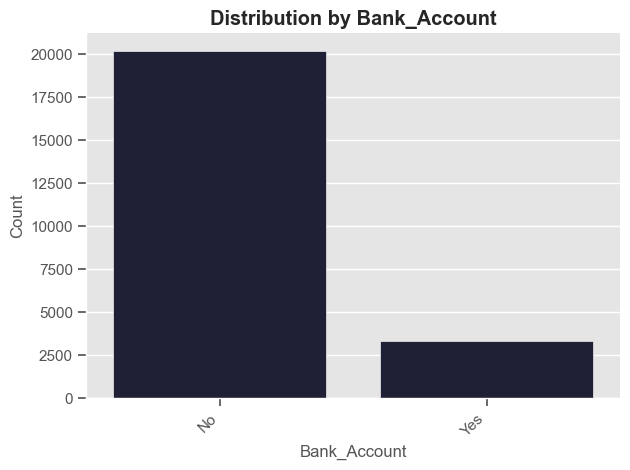

In [146]:
# Target variable
univariate.countplot('bank_account')

There is an imbalance in our target variable as most of the respondents do not have a bank account. The imbalance will be handled in the preprocessing stage

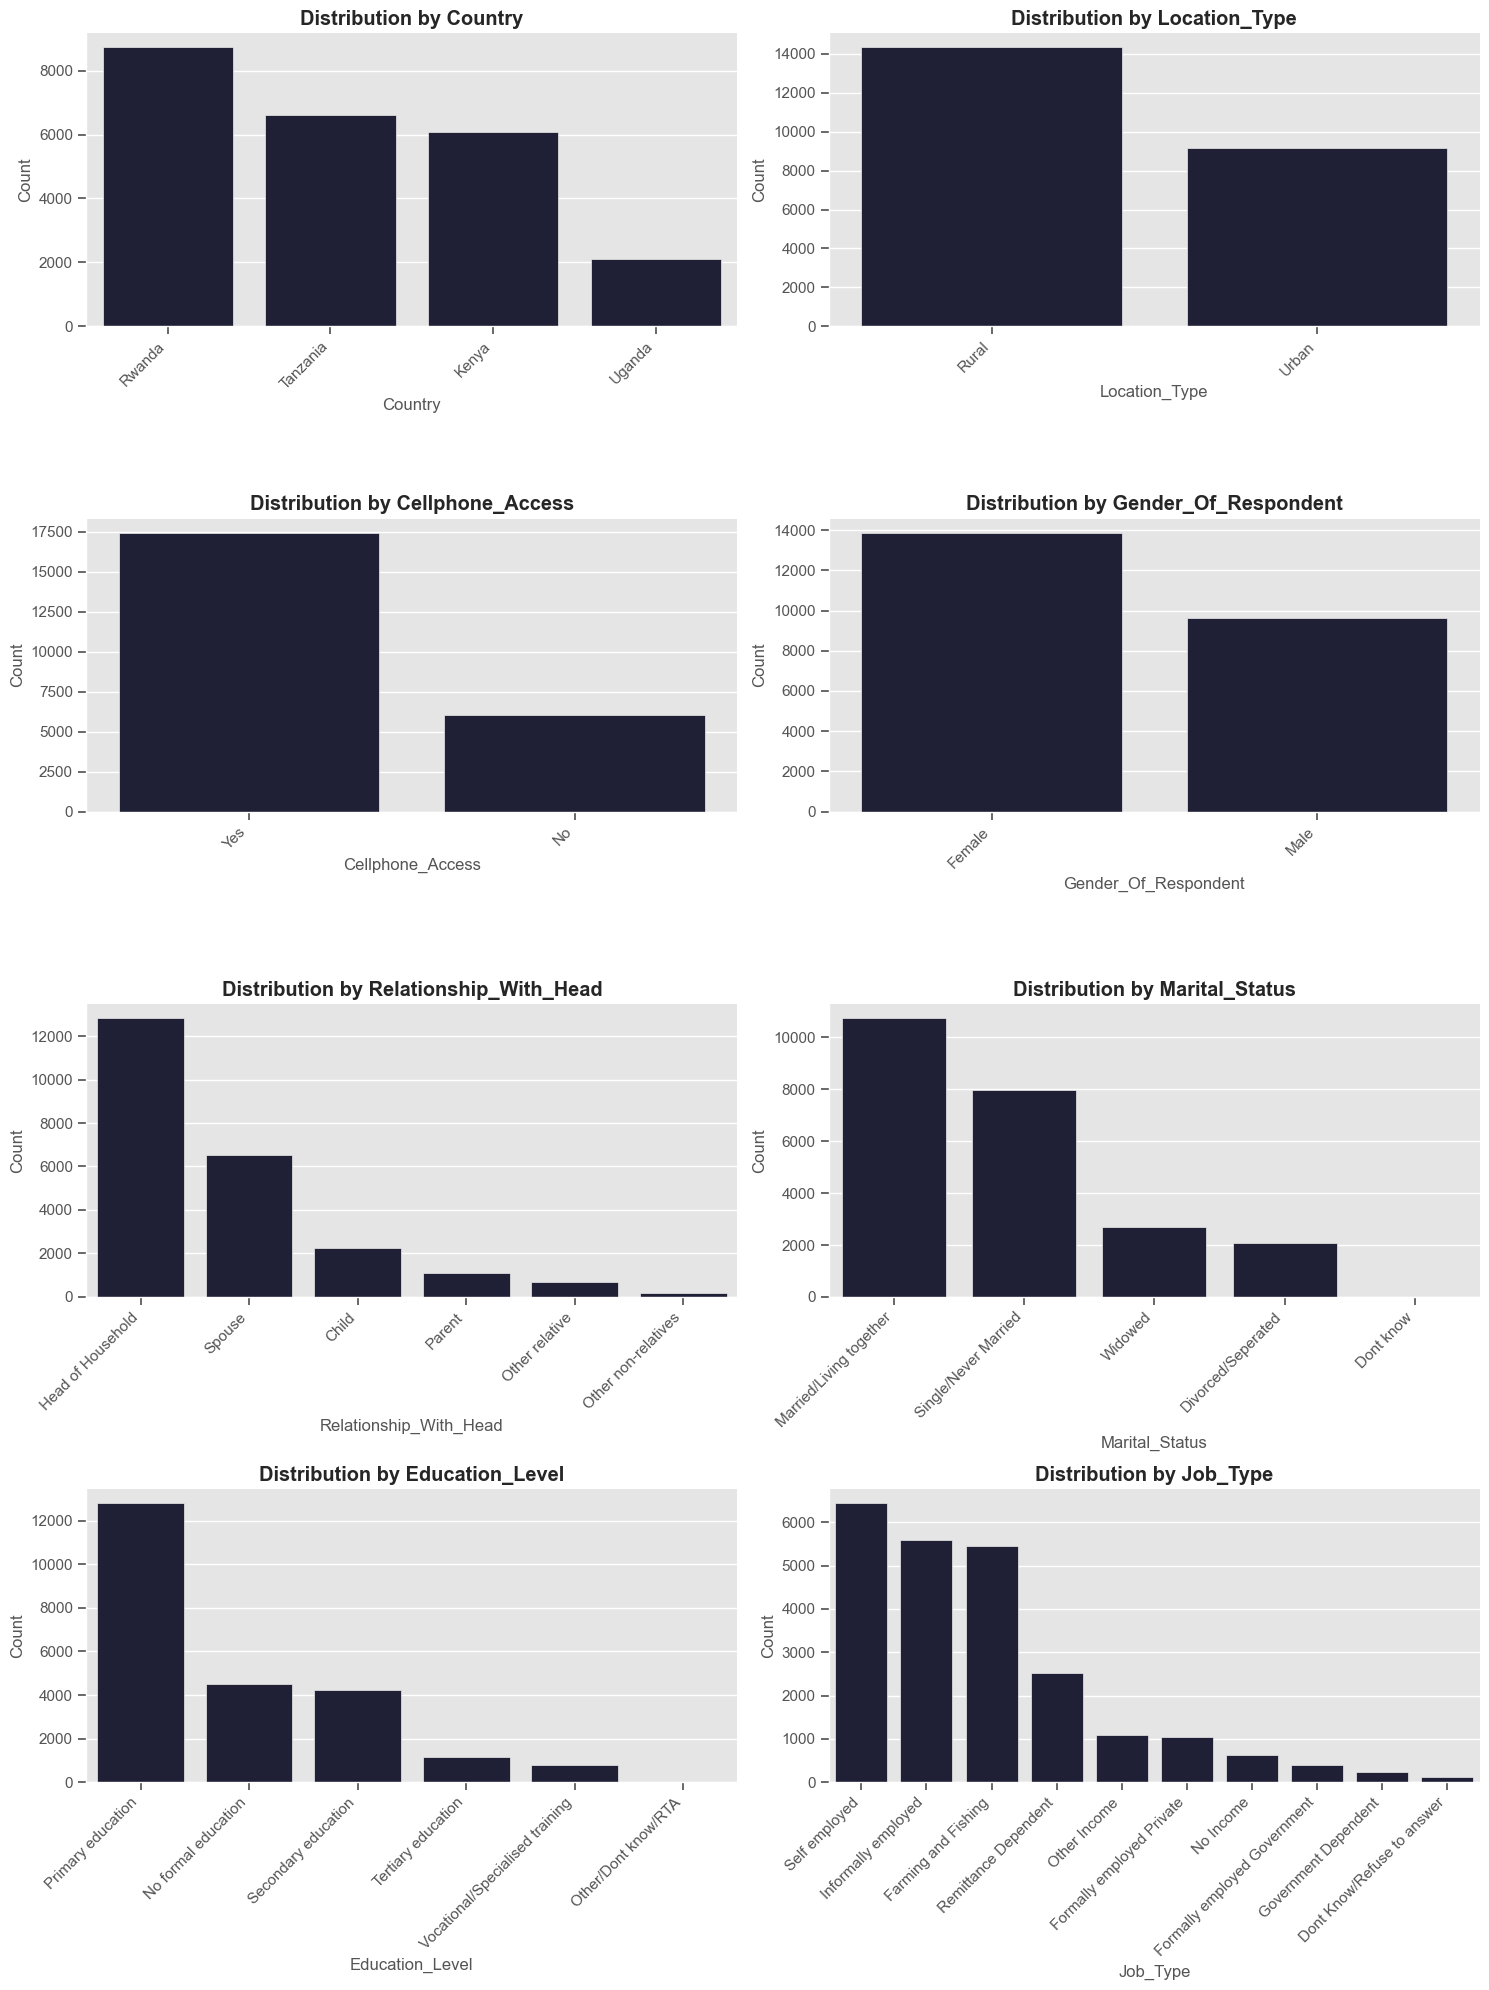

In [147]:
# Categorical Columns
univariate.plot_all_countplots(['country',
    'location_type',
    'cellphone_access',
    'gender_of_respondent',
    'relationship_with_head',
    'marital_status',
    'education_level',
    'job_type'])

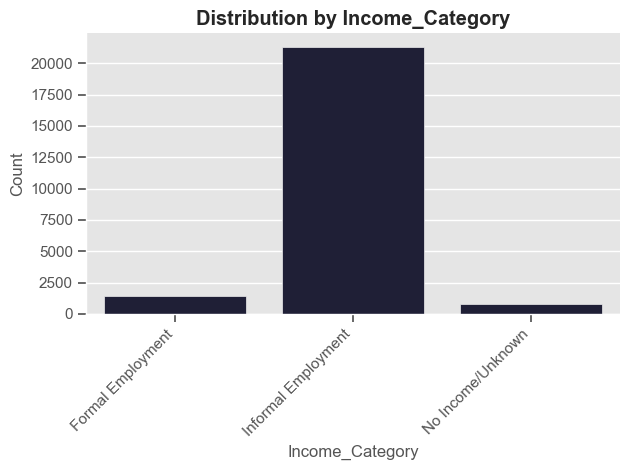

In [171]:
# grouping values in the job type category
income_categories = {
    'Formally employed Private': 'Formal Employment',
    'Formally employed Government': 'Formal Employment',
    'Self employed': 'Informal Employment',
    'Informally employed': 'Informal Employment',
    'Farming and Fishing': 'Informal Employment',
    'Remittance Dependent': 'Informal Employment',
    'Government Dependent': 'Informal Employment',
    'Other Income': 'Informal Employment',
    'No Income': 'No Income/Unknown',
    'Dont Know/Refuse to answer': 'No Income/Unknown'
}
data['income_category'] = data['job_type'].map(income_categories).astype('category')

univariate.countplot('income_category')

<span style="color:#f7aef8">**Summary of Univariate Analysis of the  Categorical Variables:**</span>

- `bank_account` - a significant number of the respondents do not have a bank account
- `country` - Rwanda has the most number of respondents in the dataset and Uganda the least
- `location_type` - Most of the respondents are based in the rural areas
- `cellphone_access` - Majority of the respondents have an acess to a cellphone
-  `gender_of_respondent` - Females were the dominant gender among the respondents
- `relationship_with_head` - The majority of the respondents were household heads, with spouses to the respondents following closely
- `marital_status` - Many of the respondents were married or living together
- `educational_level` - The majority of respondents had only completed primary education as their highest level of education
- `job_type` - Many of respondents were self-employed, with those employed in the informal sector and farming/fishing following closely
- `income_category` - Most of the respondents are informally employed

Numerical data
- `age_of_respondent` is continuous variable while `year` and `household_size` are discrete variables

In [148]:
print(f'Numerical columns:{numerical}')

Numerical columns:['year', 'household_size', 'age_of_respondent']


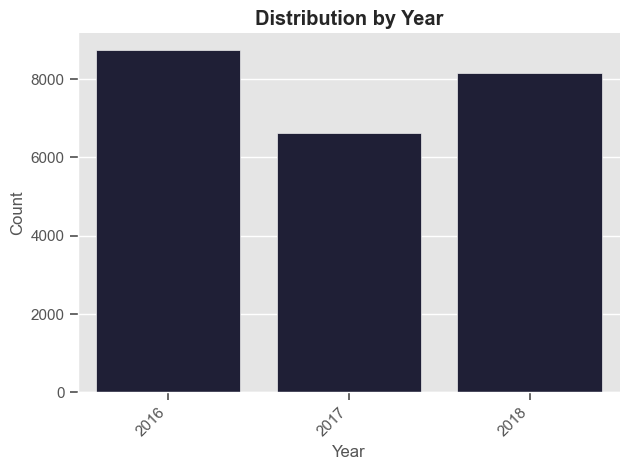

In [149]:
# Year distribution
univariate.countplot('year')

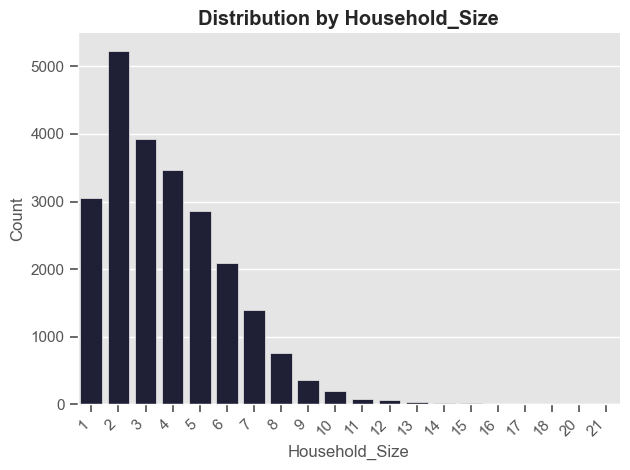

In [150]:
# Household_size distribution
univariate.countplot('household_size')

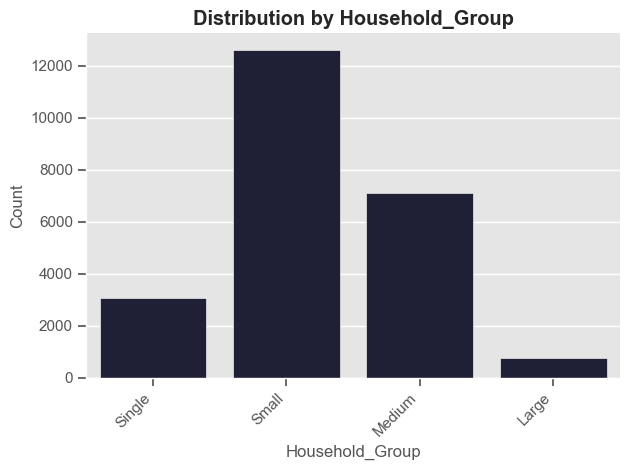

In [151]:
# Age distribution of the respondents
bins= [0, 1, 4, 8, float("inf")]
labels = ['Single','Small','Medium','Large']

data['household_group'] = pd.cut(data['household_size'], bins=bins, labels=labels, right=True).astype('category')
univariate.countplot('household_group')

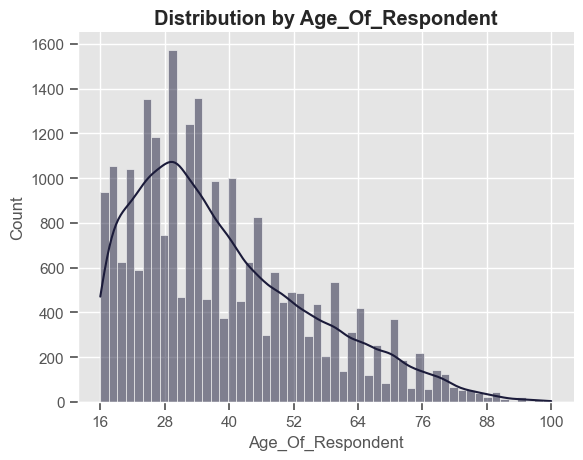

In [152]:
# # Increase the number of values appearing in the x axis
univariate.histplot('age_of_respondent')

plt.xticks(np.arange(min(data['age_of_respondent']), max(data['age_of_respondent'])+1, 12));

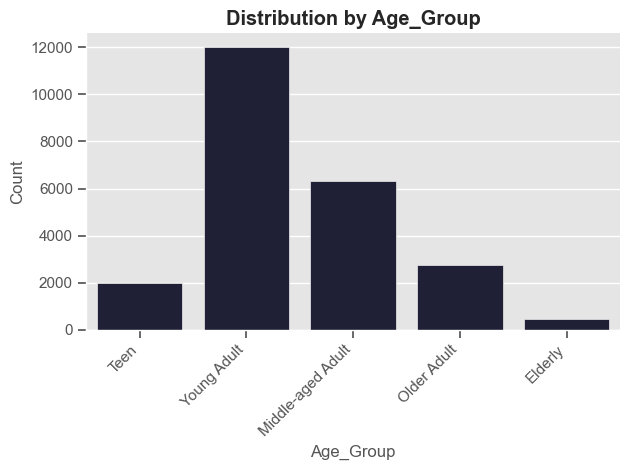

In [153]:
# Age distribution of the respondents
bins= [15, 19, 39, 59, 79, 110]
labels = ['Teen','Young Adult','Middle-aged Adult','Older Adult','Elderly']
data['age_group'] = pd.cut(data['age_of_respondent'], bins=bins, labels=labels, right=True).astype('category')

univariate.countplot('age_group')

<span style="color:#f7aef8">**Summary of Univariate Analysis of the Numerical Variables:**</span>

- `year` - There were more respondents in 2016 and 2018 than there were in 2017
- `household_size` - More respondents came from small households that consisted of 2-4 people and the number decreases as the number of people in the household increase
- `age_of_respondent` - It is right skewed with most of the respondents at the age of 30. With most of the respondents being Young Adults

#### Bivariate Analysis

Analysis we'd like to see:
- All columns in relation to having a bank account
- How does country and location relate relate with having a bank account
- How is the spread of gender by country and its relation to having a bank account

In [205]:
def bivariate(column1:str, hue='bank_account', data=data):
    if type(hue) == list:
        n_plots = len(hue) + 1
        n_cols = math.ceil(math.sqrt(n_plots))
        n_rows = math.ceil(n_plots / n_cols)
        f, ax = plt.subplots(n_rows, n_cols, figsize=(20, 15))

        sns.countplot(x=column1, data=data, ax=ax[0, 0], color='#1b1b3a', order=data[column1].value_counts().index)
        for i, column in enumerate(hue):
            if data[column].dtype == 'category':
                sns.countplot(x=column1, hue=column, data=data, ax=ax[(i + 1) // n_cols, (i + 1) % n_cols], palette='ocean', order=data[column1].value_counts().index)
                abs_values = data[column].value_counts(ascending=False).values
                ax[0,0].set_title(f'{column1.title()} Distribution',fontweight='bold')
                ax[(i + 1) // n_cols, (i + 1) % n_cols].set_title(f'{column.title()} Distribution by {column1.title()}',fontweight='bold')
                ax[(i + 1) // n_cols, (i + 1) % n_cols].set_ylabel('Count')
                ax[(i + 1) // n_cols, (i + 1) % n_cols].set_xlabel('{}'.format(column1.title()))
                plt.setp(ax[(i+1) // n_cols, (i+1) % n_cols].get_xticklabels(), rotation=45, ha="right")
                plt.setp(ax[0,0].get_xticklabels(), rotation=45, ha="right")

                plt.subplots_adjust(hspace=0.65)
            else:
                print(f'{column} is an integer, please replace with a category column')
    else:
        sns.countplot(x=column1, hue=hue, data=data,  palette='ocean', order=data[column1].value_counts().index)
        plt.title(f'{column1.title()} Distribution',fontweight='bold')
        plt.ylabel('Count')
        plt.xlabel('{}'.format(column1.title()))
        plt.xticks(rotation=45, horizontalalignment="right")
        plt.tight_layout()
        plt.show()


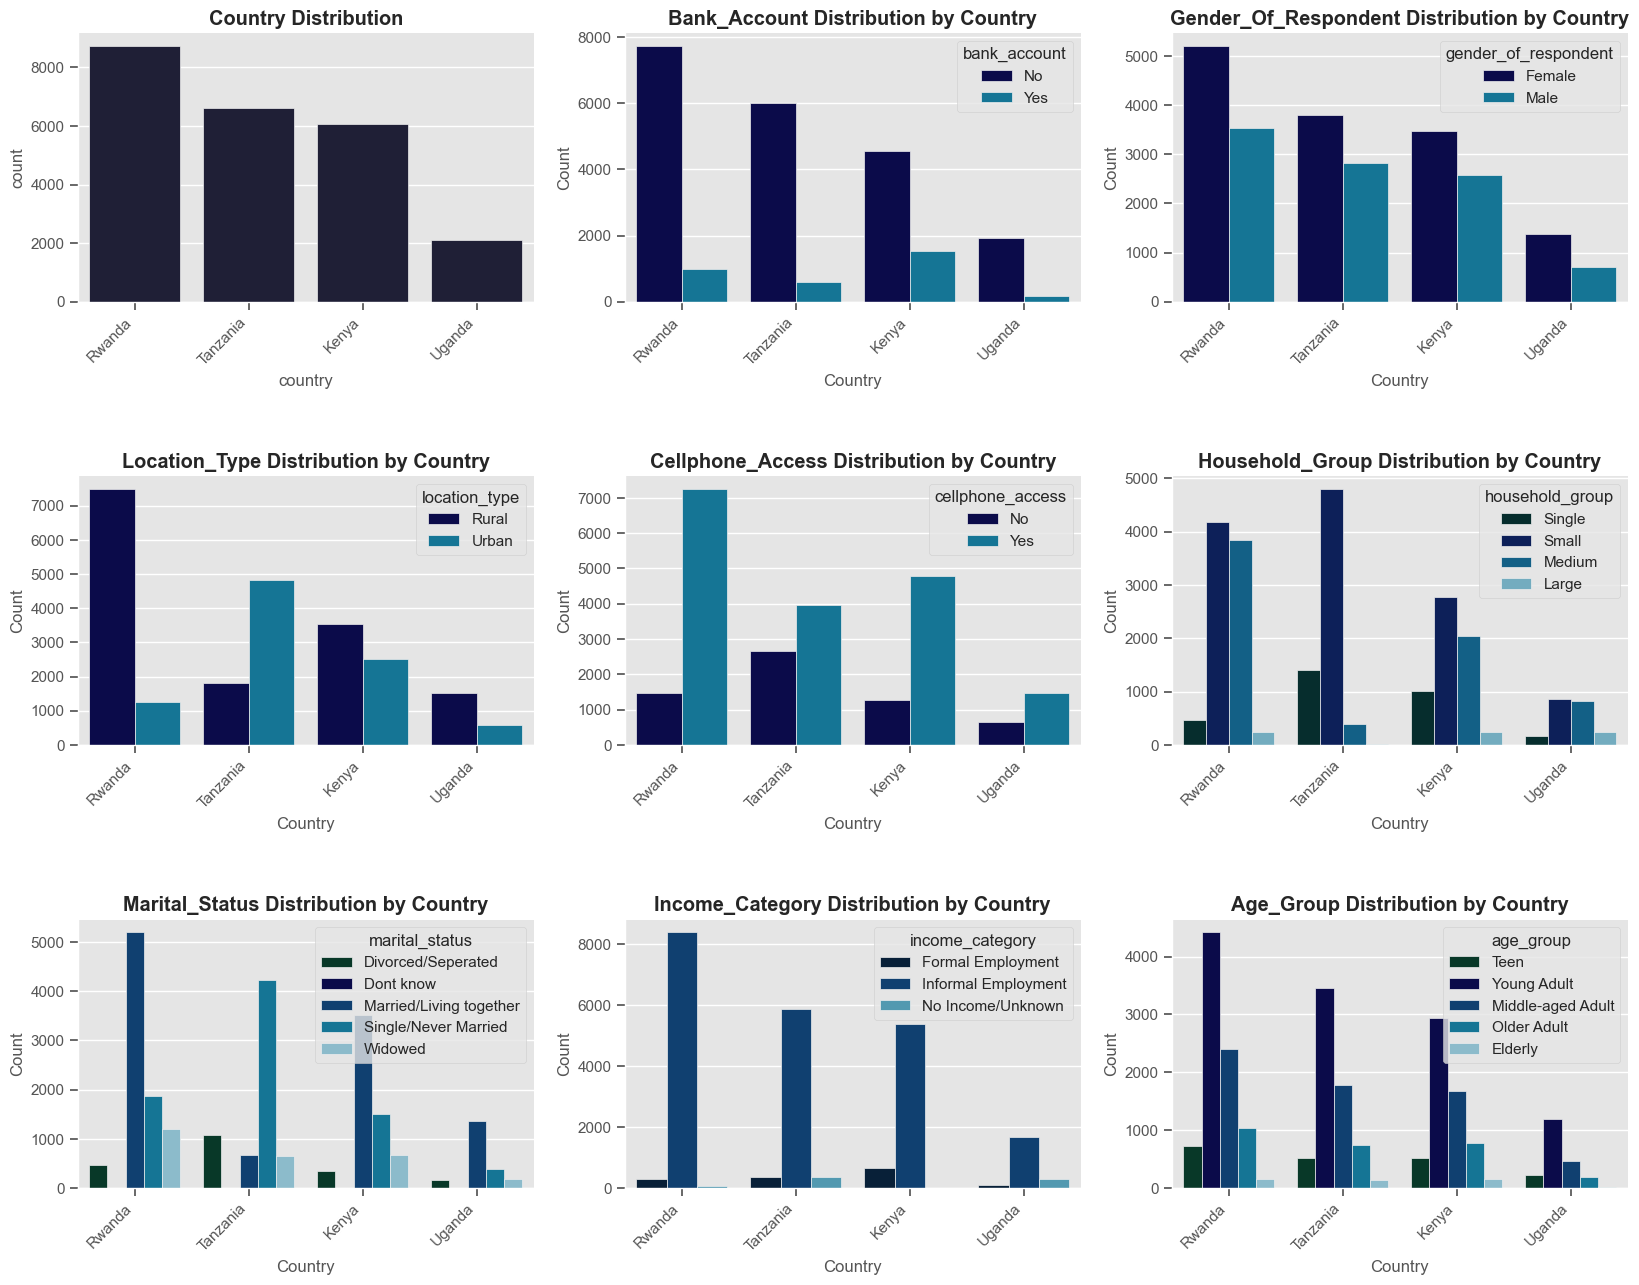

In [206]:
bivariate(column1='country',hue=['bank_account', 'gender_of_respondent', 'location_type','cellphone_access','household_group', 'marital_status', 'income_category','age_group'])

<span style="color:#f7aef8">**Summary of Bivariate Analysis of the Country:**</span>

- Most of the respondents in Rwanda do not have a bank account while Kenya led with the largest amount of people with bank accounts
- Females dominated the gender list in all countries with Rwanda having the highest number of both female and male genders.
- Tanzania was the only country where most of the respondents lived in Urban Areas.
- Despite most people living in Rural areas in Rwanda, many of them have access to celphones and this is seen acress all countries
- The majority of the respondents come from small households that consist of 2-4 people with Tanzania having a significantly less number on the other types of households
- The trend of having a higher proportion of single or never married persons is unique to Tanzanian respondents.
- Most of the respondents are employed in the informal sector  
- Insights on the countrys' age groups:
    -  For all countries, most of the respondents were Young Adults; aged 20-39
    - There were very few teens and elderly respondents in all countries

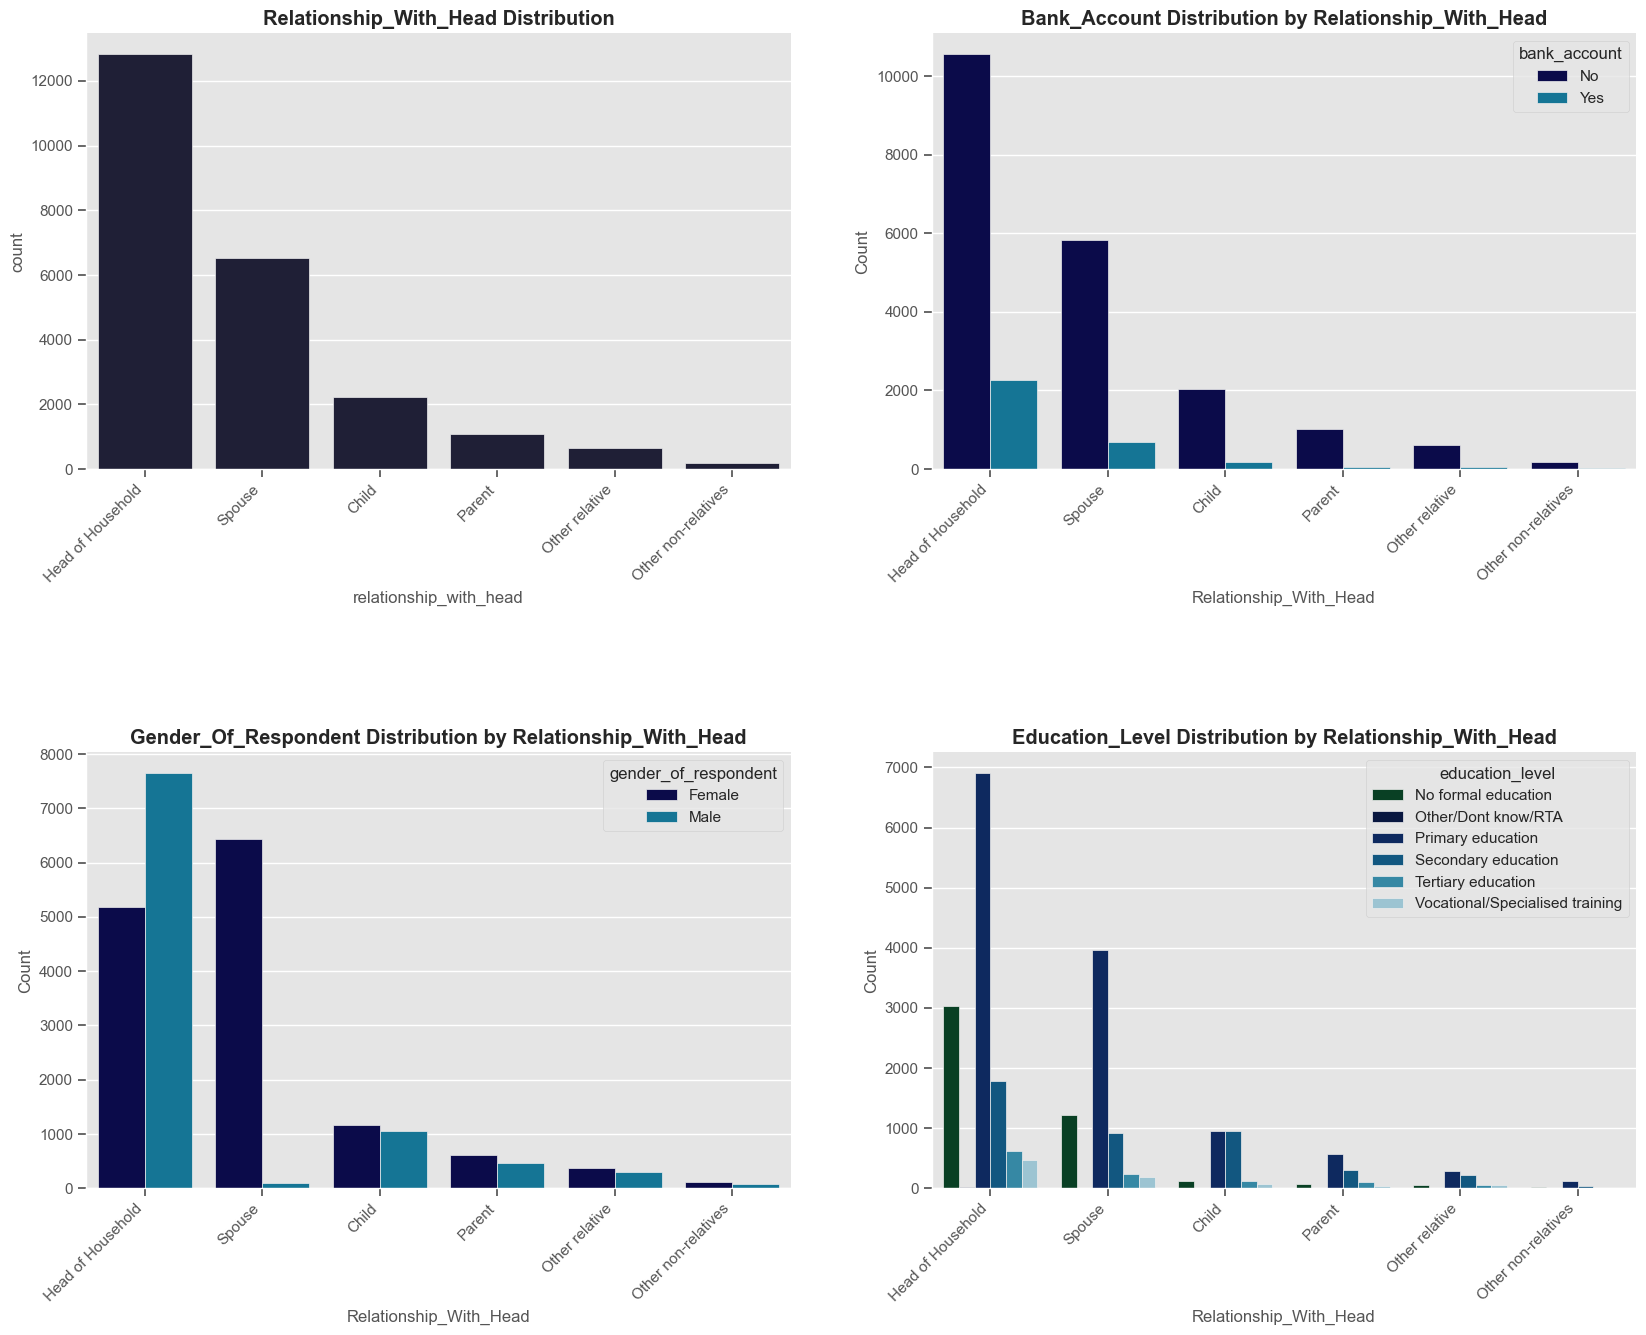

In [203]:
bivariate(column1='relationship_with_head',hue=['bank_account','gender_of_respondent', 'education_level'])

<span style="color:#f7aef8">**Summary of Bivariate Analysis of the Relationship with Head of the House:**</span>

- The majority of participants were household heads, and a significant portion of them were male. However, for interviewees who were the spouse of the household head, they tended to be female.
- Many of the respondents achieved a primary level of education, with a significant proportion of household heads and their spouses reporting no formal education. In the case of children, there was a near parity in the number of individuals achieving primary and secondary levels of education.

Other columns

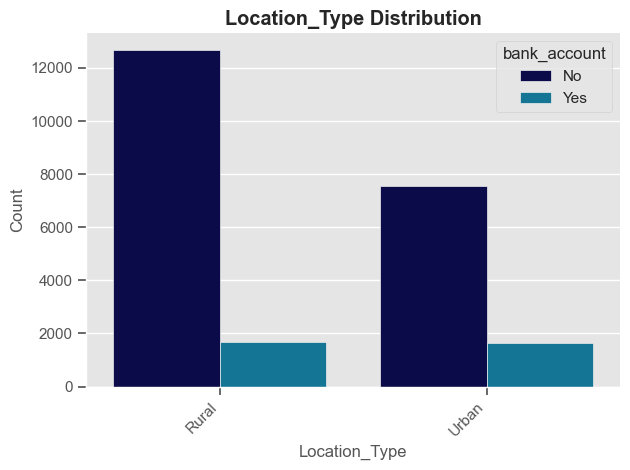

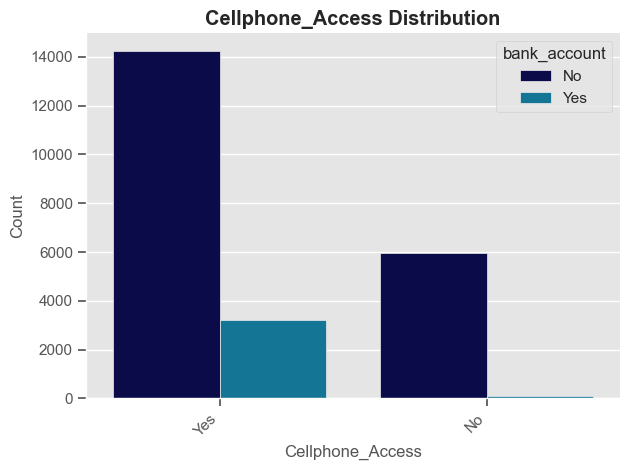

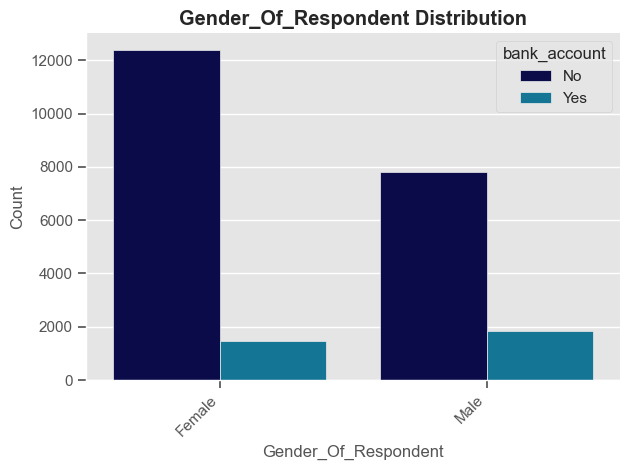

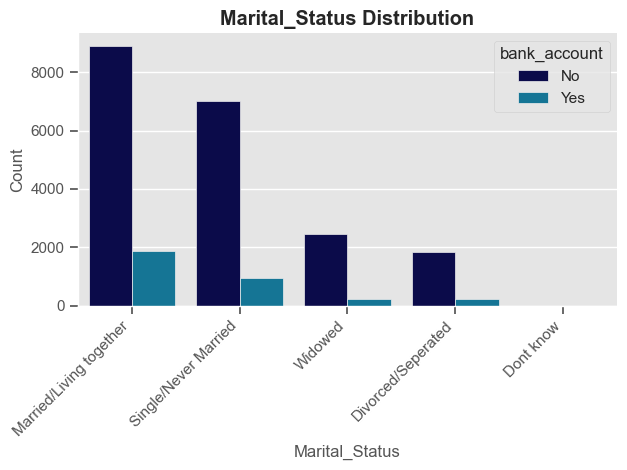

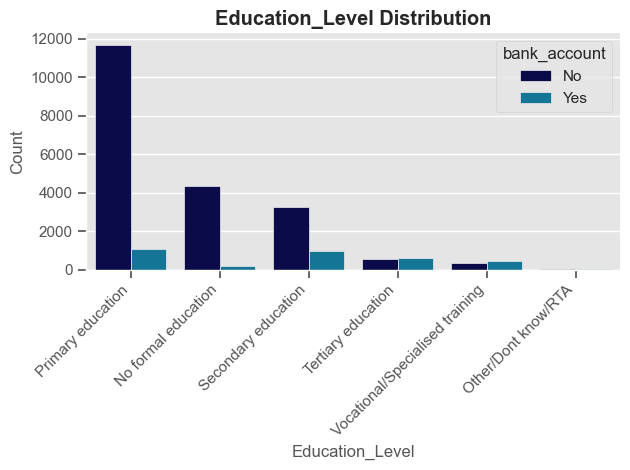

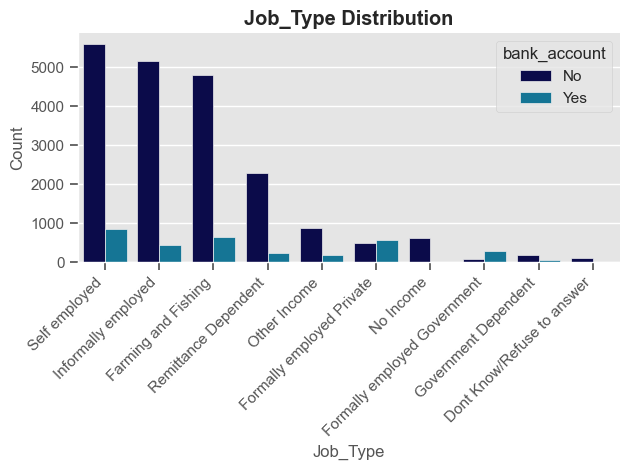

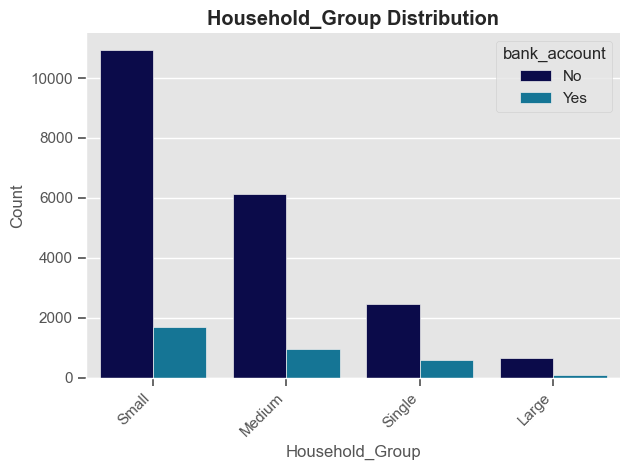

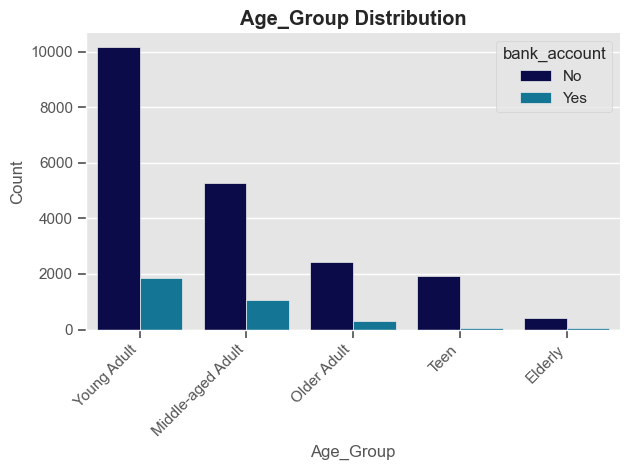

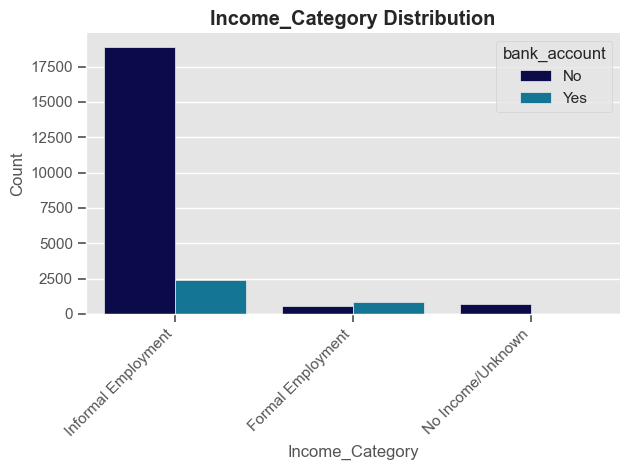

In [209]:
for column in ['location_type','cellphone_access','gender_of_respondent','marital_status','education_level',
            'job_type','household_group','age_group','income_category']:
            bivariate(column)


<span style="color:#f7aef8">**Summary of Bivariate Analysis of the Relationship with All Other Columns:**</span>

- The dominant feature across location, cellphone access, gender, marital status, educational level, job type, household group, age group, and income category was the lack of a bank account

### Data Preprocessing

#### Encoding
- LabelEncoder - Target variable
- check for nominal and ordinal category
- Others - OHE

In [ ]:
# Encode the taget variable


I'm here
- Perform EDA:
    - Univariate
    - Bivariate
    - Please don't use pie charts
    - Maybe use pivot tables like Ken Jee?
    - Outliers
- Maybe consider doing the eda like the kaggle notebook?
- Have observation in a nutshell at the end where you highlight all the columns and talk about them
    - This is done after you have done the EDA and gave an explannation on all of them

- Encode the categorical columns
    - LabelEncoder - Target variable
    - check for nominal and ordinal category
    - Others - OHE
- Correlation 
